<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/hdfc_eda_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘RcppArmadillo’, ‘Quandl’, ‘rugarch’, ‘ADGofTest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’

# New Section

In [2]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend



Attaching package: ‘TSA’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 

Loading required package: timeDate


Attaching package: ‘timeDate’


The following objects are masked from ‘package:TSA’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAn

In [3]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-28"

In [4]:
# Download data from Yahoo Finance
symbol<-getSymbols("HDFC.NS",from=start_date,auto.assign=FALSE)



‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




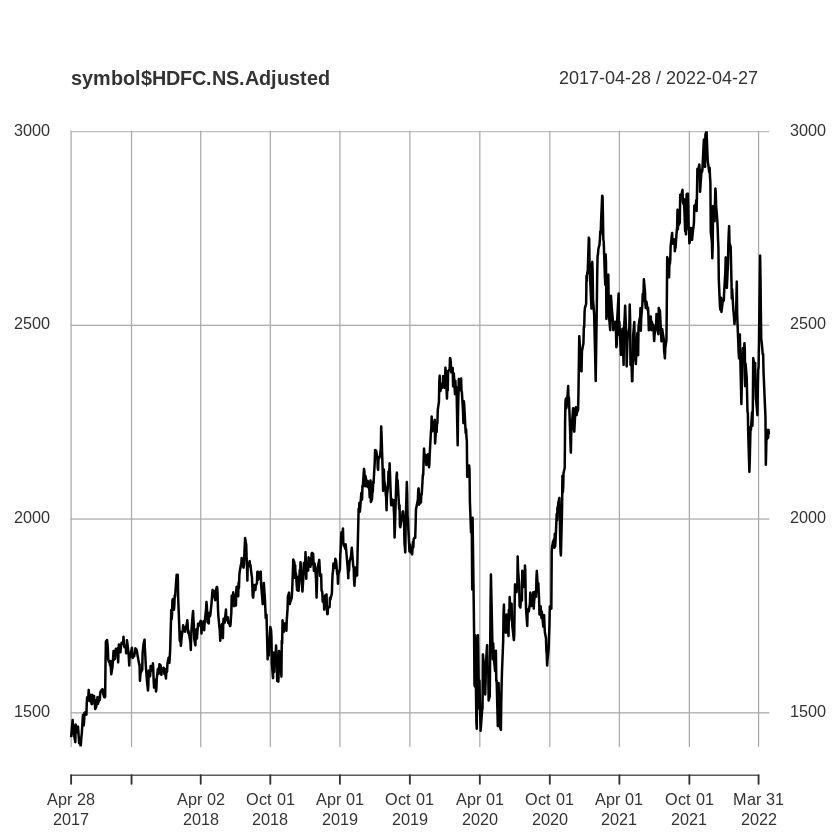

In [5]:
plot(symbol$HDFC.NS.Adjusted)

In [6]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$HDFC.NS.Volume>0,]

     Index             HDFC.NS.Open   HDFC.NS.High   HDFC.NS.Low  
 Min.   :2017-04-28   Min.   :1476   Min.   :1530   Min.   :1473  
 1st Qu.:2018-07-23   1st Qu.:1800   1st Qu.:1824   1st Qu.:1777  
 Median :2019-11-01   Median :1983   Median :1998   Median :1962  
 Mean   :2019-10-27   Mean   :2102   Mean   :2126   Mean   :2076  
 3rd Qu.:2021-01-26   3rd Qu.:2424   3rd Qu.:2448   3rd Qu.:2402  
 Max.   :2022-04-27   Max.   :3004   Max.   :3021   Max.   :2971  
 HDFC.NS.Close  HDFC.NS.Volume     HDFC.NS.Adjusted
 Min.   :1500   Min.   :  119832   Min.   :1413    
 1st Qu.:1798   1st Qu.: 2239477   1st Qu.:1723    
 Median :1979   Median : 3168128   Median :1899    
 Mean   :2101   Mean   : 3715195   Mean   :2042    
 3rd Qu.:2424   3rd Qu.: 4352364   3rd Qu.:2382    
 Max.   :3001   Max.   :34117717   Max.   :3001    

In [7]:
# Computing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$HDFC.NS.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"hdfc_returns.csv",row.names=FALSE)

           HDFC.NS.Adjusted
2017-05-02      0.030496588
2017-05-03     -0.008523232
2017-05-04     -0.004433152
2017-05-05     -0.011249820
2017-05-08     -0.011279555
2017-05-09     -0.003930536

In [8]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)



In [9]:
jarqueberaTest(prices$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 101.7427
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Thu Apr 28 14:47:33 2022 by user: 


In [10]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for HDFC
jarqueberaTest(returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 2722.2653
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Thu Apr 28 14:47:36 2022 by user: 


In [11]:
# Now we do other tests for same data for cross check
shapiroTest(prices$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9298
  P VALUE:
    < 2.2e-16 

Description:
 Thu Apr 28 14:47:39 2022 by user: 


In [12]:
shapiroTest(returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.914
  P VALUE:
    < 2.2e-16 

Description:
 Thu Apr 28 14:47:41 2022 by user: 


In [13]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$HDFC.NS.Adjusted) #  p-value = 0.41, not stationary


	Augmented Dickey-Fuller Test

data:  prices$HDFC.NS.Adjusted
Dickey-Fuller = -2.366, Lag order = 10, p-value = 0.4234
alternative hypothesis: stationary


In [14]:
adf.test(returns$HDFC.NS.Adjusted) 

Warning message in adf.test(returns$HDFC.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$HDFC.NS.Adjusted
Dickey-Fuller = -11.582, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [15]:
summary(ur.kpss(prices$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 10.6302 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [16]:
summary(ur.kpss(returns$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.0687 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


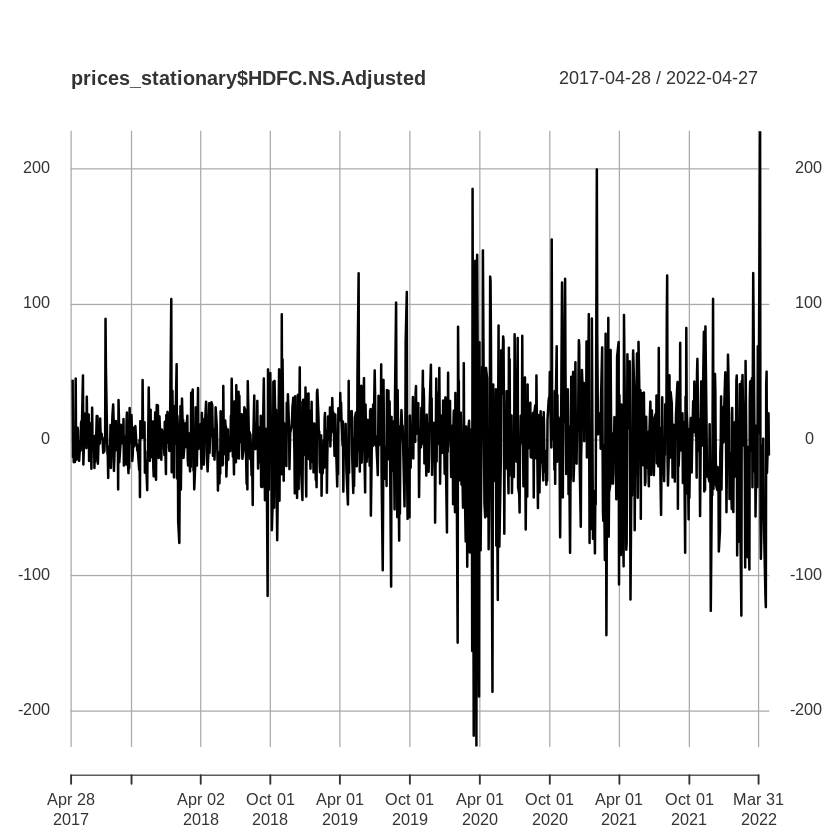

In [17]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices_stationary <- diff(prices)
plot (prices_stationary$HDFC.NS.Adjusted)

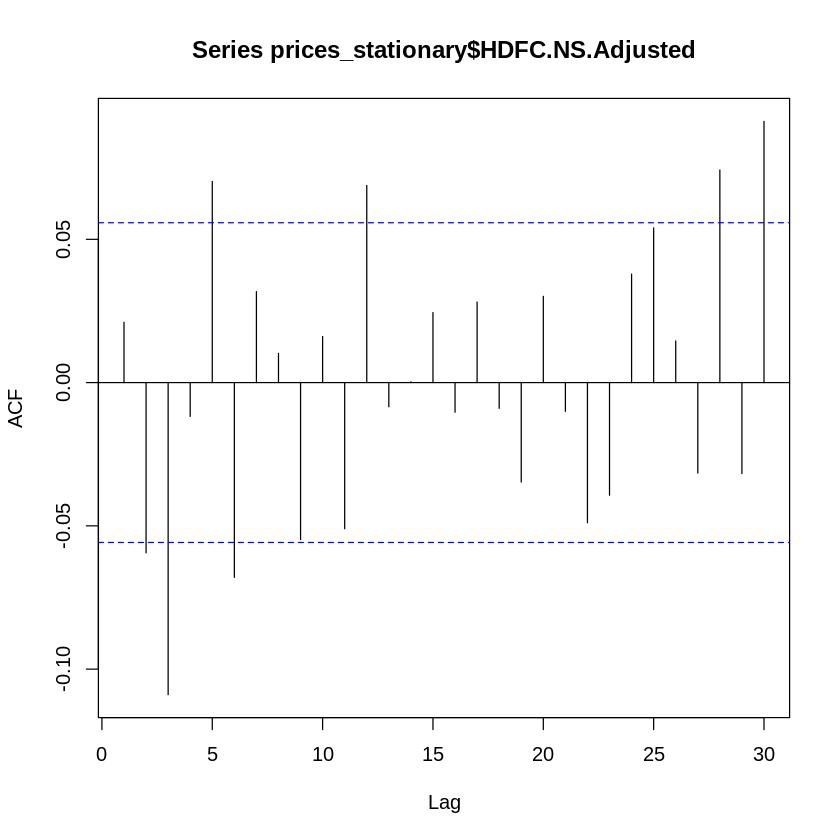

In [18]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices_stationary<-na.omit(prices_stationary)
acf(prices_stationary$HDFC.NS.Adjusted)

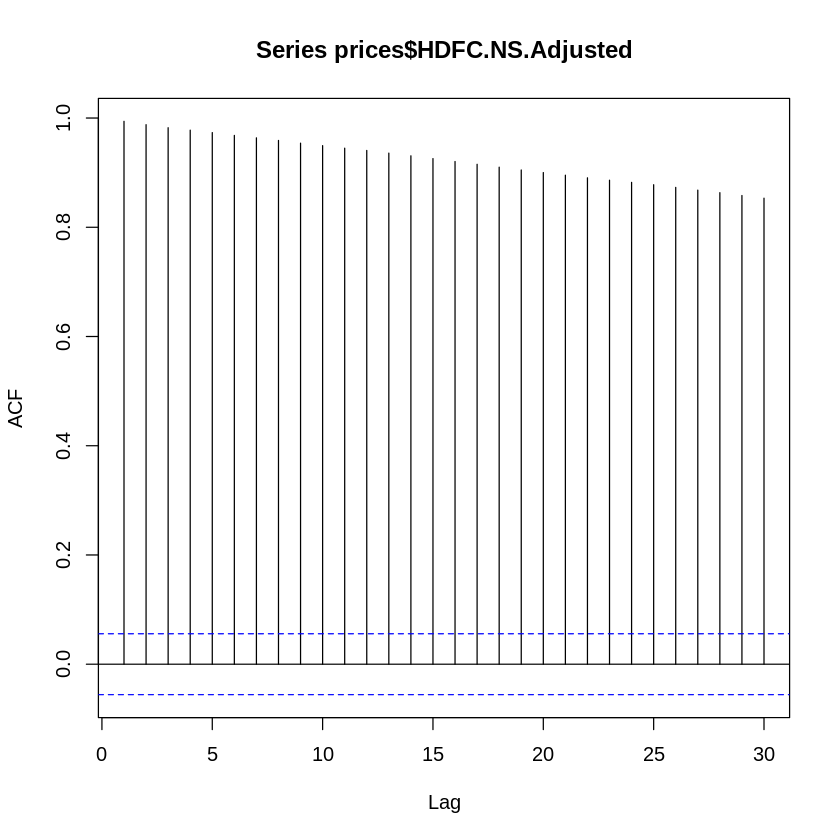

In [19]:
# on the otherhand if we compute ACF on data with trend
prices<-na.omit(prices)
acf(prices$HDFC.NS.Adjusted)

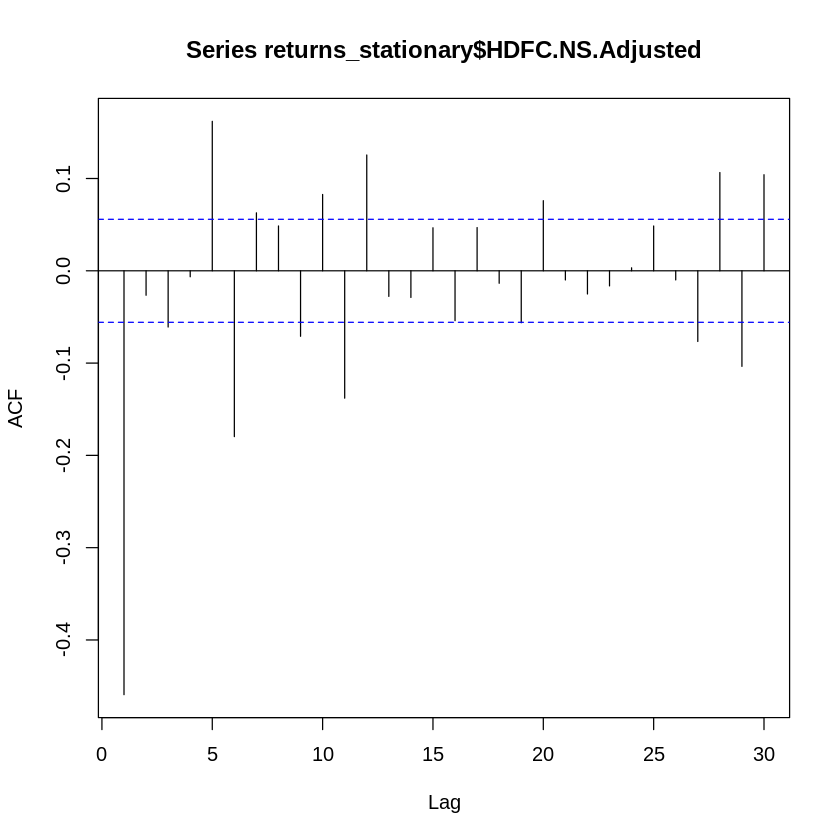

In [20]:
# similarly, finding acf for returns.
returns_stationary <- diff(returns)
returns_stationary<-na.omit(returns_stationary)
acf(returns_stationary$HDFC.NS.Adjusted)

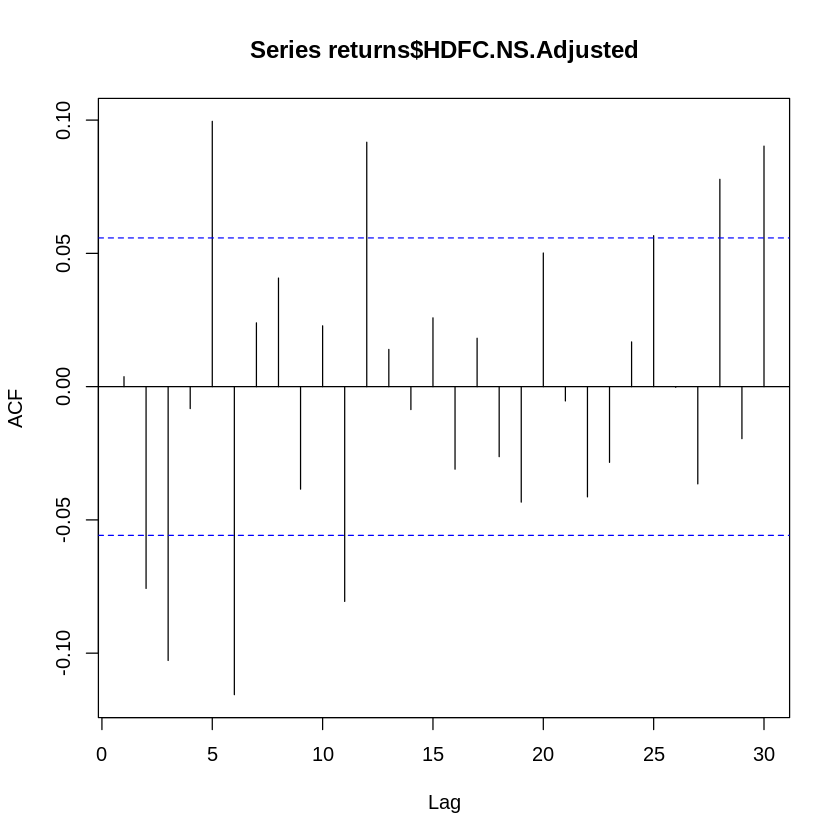

In [21]:
# on the otherhand if we compute ACF on data with trend
returns<-na.omit(returns)
acf(returns$HDFC.NS.Adjusted)

In [22]:
# tests for auto-corelation
Box.test(prices_stationary$HDFC.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices_stationary$HDFC.NS.Adjusted
X-squared = 25.906, df = 5, p-value = 9.304e-05


In [23]:
# for returns
Box.test(returns_stationary$HDFC.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns_stationary$HDFC.NS.Adjusted
X-squared = 298.76, df = 5, p-value < 2.2e-16


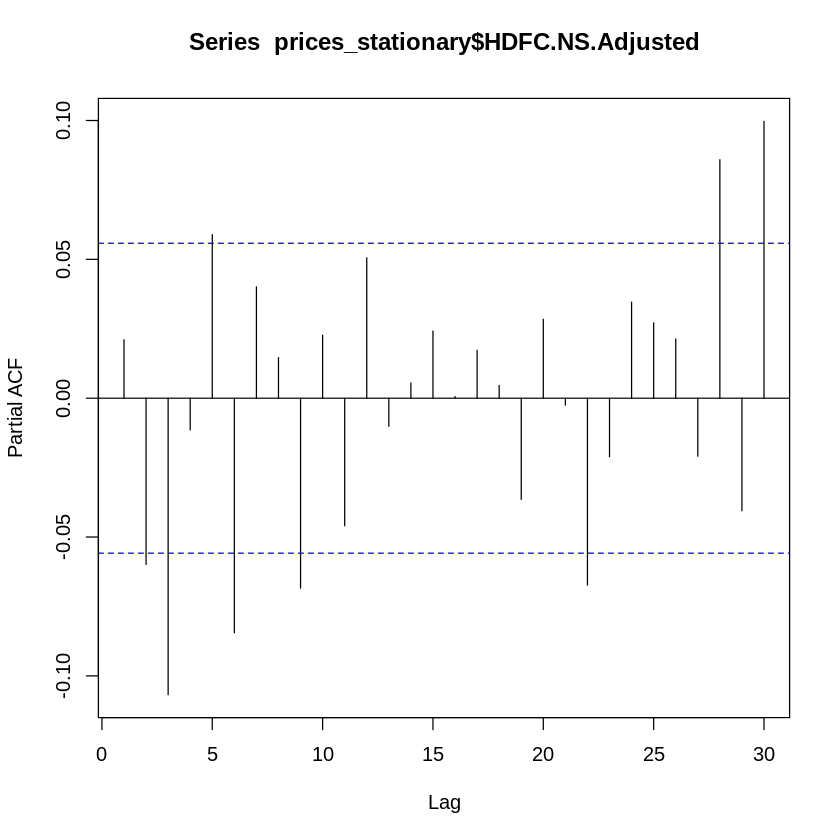

In [24]:
#PACF
pacf(prices_stationary$HDFC.NS.Adjusted)

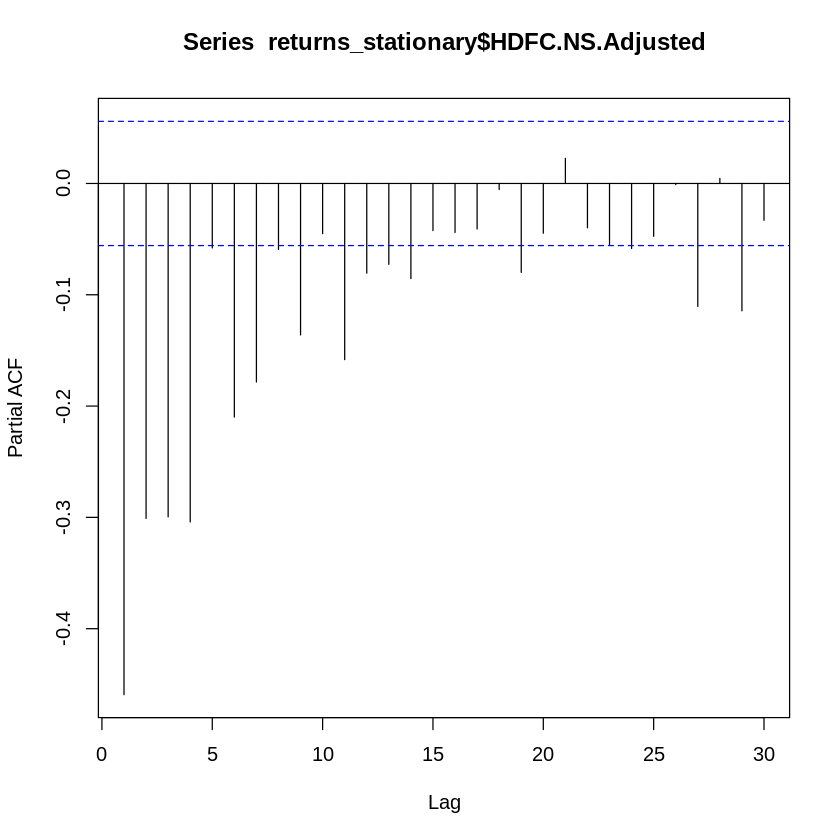

In [25]:
pacf(returns_stationary$HDFC.NS.Adjusted)

In [26]:
basicStats(prices)

,HDFC.NS.Adjusted
,<dbl>
nobs,1.235000e+03
NAs,0.000000e+00
Minimum,1.413075e+03
Maximum,3.000850e+03
1. Quartile,1.722763e+03
3. Quartile,2.382077e+03
Mean,2.041873e+03
Median,1.898657e+03
Sum,2.521713e+06


In [28]:
BoxCox.lambda(prices$HDFC.NS.Adjusted)

[1] 0.9109218

In [29]:
# To make our data appear normal
prices_normal<-prices
prices_normal$HDFC.NS.Adjusted<-forecast::BoxCox(prices$HDFC.NS.Adjusted, lambda = 0.910921806270185)
basicStats(prices_normal)

,HDFC.NS.Adjusted
,<dbl>
nobs,1.235000e+03
NAs,0.000000e+00
Minimum,8.118694e+02
Maximum,1.613322e+03
1. Quartile,9.726966e+02
3. Quartile,1.307064e+03
Mean,1.134050e+03
Median,1.062867e+03
Sum,1.400551e+06


In [30]:
returns_normal<-returns
# to handle negative values in the returns
returns_normal<-exp(returns_normal)
returns_normal<-na.omit(returns_normal)
BoxCox.lambda(returns_normal$HDFC.NS.Adjusted)


[1] 1.999924

In [31]:
returns_normal$HDFC.NS.Adjusted<-forecast::BoxCox(returns$HDFC.NS.Adjusted, lambda = 1.99992424816297)
# need to take log, basically to undo the exp above
# returns_normal<-log(returns_normal) 
basicStats(returns_normal)

,HDFC.NS.Adjusted
,<dbl>
nobs,1234.000000
NAs,0.000000
Minimum,-0.510202
Maximum,-0.495312
1. Quartile,-0.500066
3. Quartile,-0.499968
Mean,-0.500022
Median,-0.500019
Sum,-617.026987


In [32]:
model<-auto.arima(prices$HDFC.NS.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(4,1,2)   


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 12570.13
 ARIMA(0,1,0) with drift         : 12577.17
 ARIMA(1,1,0) with drift         : 12578.41
 ARIMA(0,1,1) with drift         : 12578.56
 ARIMA(0,1,0)                    : 12575.48
 ARIMA(1,1,2) with drift         : 12572.72
 ARIMA(2,1,1) with drift         : 12570.99
 ARIMA(3,1,2) with drift         : 12565.72
 ARIMA(3,1,1) with drift         : 12567.64
 ARIMA(4,1,2) with drift         : 12545.77
 ARIMA(4,1,1) with drift         : 12566.04
 ARIMA(5,1,2) with drift         : 12554.81
 ARIMA(4,1,3) with drift         : 12564.14
 ARIMA(3,1,3) with drift         : 12561.17
 ARIMA(5,1,1) with drift         : 12563.82
 ARIMA(5,1,3) with drift         : 12550.13
 ARIMA(4,1,2)                    : 12543.91
 ARIMA(3,1,2)                    : 12563.99
 ARIMA(4,1,1)                    : 12564.44
 ARIMA(5,1,2)                    : 12552.79
 ARIMA(4,1,3)                    : 12562.43
 ARIMA(3,1,1)  

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1236       2207.389 2157.485 2257.294 2131.067 2283.712
1237       2218.413 2146.279 2290.547 2108.094 2328.732
1238       2212.175 2124.947 2299.402 2078.772 2345.577
1239       2213.448 2114.990 2311.906 2062.869 2364.027
1240       2217.638 2108.622 2326.655 2050.912 2384.365
1241       2209.827 2090.543 2329.112 2027.397 2392.258
1242       2217.634 2089.848 2345.419 2022.203 2413.064
1243       2213.221 2076.616 2349.826 2004.301 2422.140
1244       2212.548 2068.119 2356.977 1991.663 2433.433
1245       2217.720 2065.939 2369.501 1985.591 2449.849


	Ljung-Box test

data:  Residuals from ARIMA(4,1,2)
Q* = 9.2337, df = 4, p-value = 0.05552

Model df: 6.   Total lags used: 10



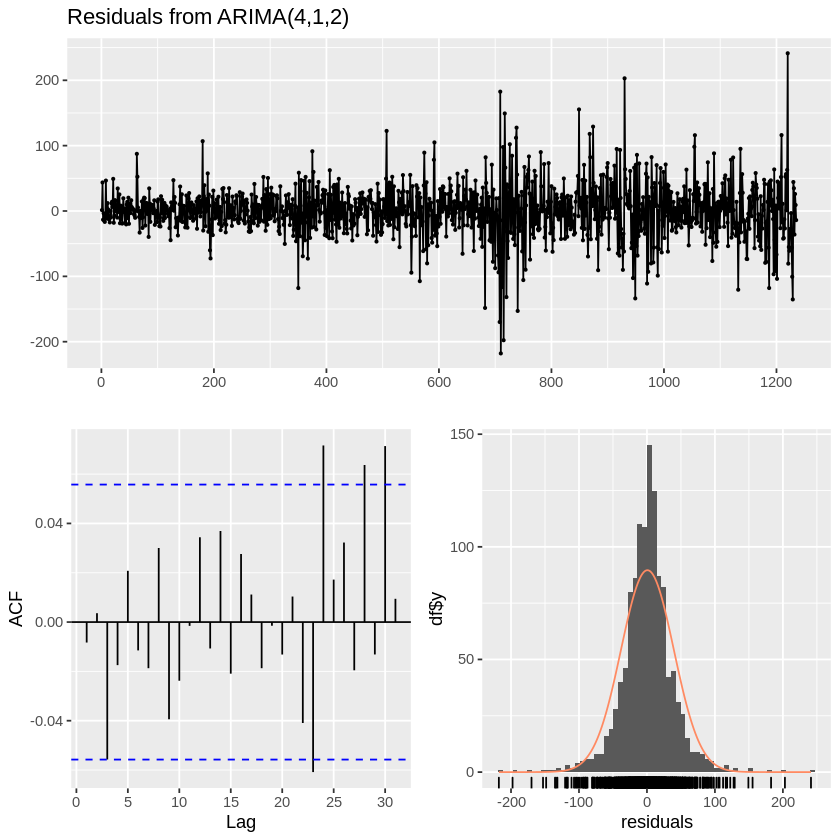

In [33]:
# Model analysis - The residuals will tell us if the model was able to capture 
# all of the information provided by the data.
checkresiduals(model)

In [34]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.6662749,38.83027,27.07724,0.01747786,1.333746,0.989393,-0.008292695


[1] 1235

[1] 44.82401

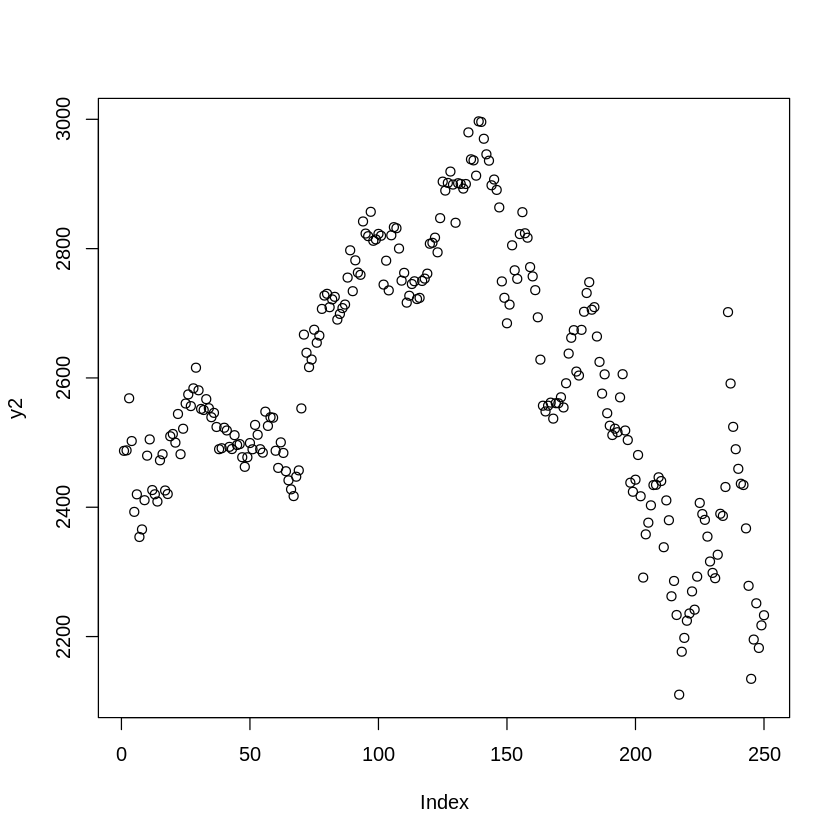

In [35]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 2201 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$HDFC.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$HDFC.NS.Adjusted,250)) 


[1] 1234

[1] 0.01789523

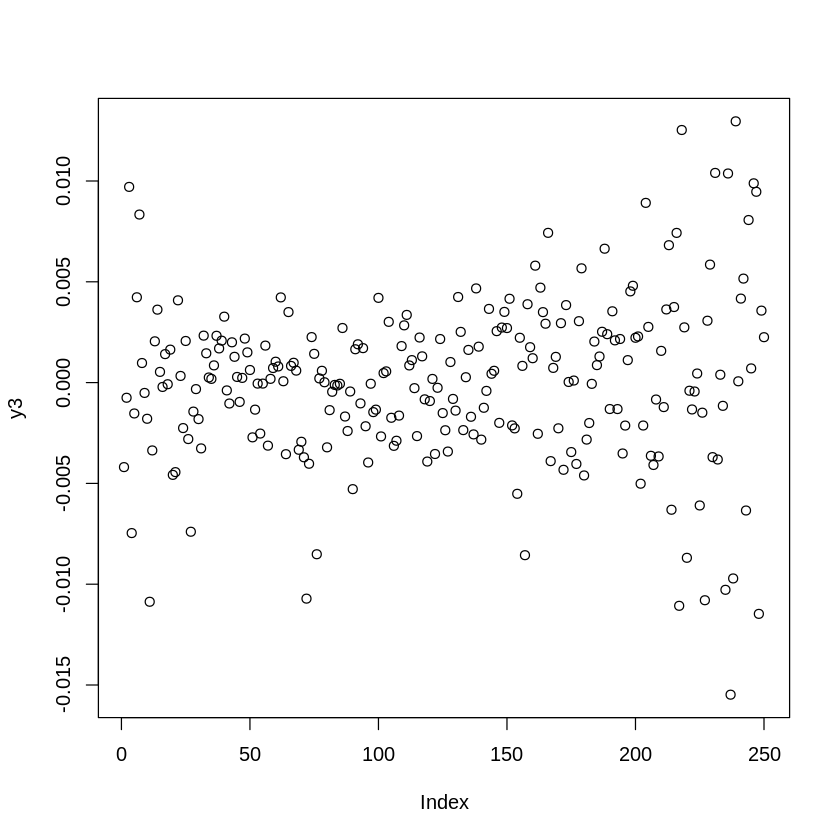

In [36]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$HDFC.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$HDFC.NS.Adjusted,250)) 